<a href="https://colab.research.google.com/github/AlanFirmino2024/Introducao_a_ciencia_de_dados/blob/main/08_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando bibliotecas

In [42]:
# Algoritimo kNN e Métricas de Avaliação de Classificação Binária

## 1. Introdução

#Este notebook apresenta os conceitos do uso do algoritimo k-Nearest Neighbors (kNN) para classificação binária. Vamos criar um conjunto de dados sintético,
#treinar o algoritmo no conjunto de treino, testa o algoritmo no conjunto de teste e avaliar seu desempenho usando a matriz de confusão e a curva ROC.

## 2. Criação do Conjunto de Dados Sintético

#Importa a biblioteca Numpy
import numpy as np
#Importa a biblioteca pandas
import pandas as pd
#Importa a função make_classification da biblioteca Scikit-learn, usada para
#gerar conjuntos de dados sintéticos.
from sklearn.datasets import make_classification
#Importa a biblioteca Matplotlib, usada para criar visualizações gráficas.
import matplotlib.pyplot as plt
#Importa a função train_test_split que divide o data set em treino e teste.
from sklearn.model_selection import train_test_split
#Importa a classe KNeighborsClassifier, que implementa o algoritmo kNN.
from sklearn.neighbors import KNeighborsClassifier
#Importa a função confusion_matrix que é usada para calcular a matriz de confusão.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Importa as funções roc_curve e AUC que são usadas para calcular e avaliar modelos.
from sklearn.metrics import roc_curve, auc
#Importa a função classification_report que é usada para calcular e avaliar modelos.
from sklearn.metrics import classification_report
#Importa a classe StandardScaler que é usada para padronizar (normalizar) os dados.
from sklearn.preprocessing import StandardScaler
#Importa a classe SVC que é que implementa o algoritmo de classificação SVM.
from sklearn.svm import SVC
#Importa a biblioteca Seaborn, que fornece uma interface de visualização de dados.
import seaborn as sns

## 3. Criando conjunto de dados sintéticos

A função "***make_classification***" cria um conjunto de dados sintético para um problema de classificação binária, onde X contém as características (features) e y os rótulos (targets). Nesse caso geramos 1000 amostras, onde cada amostra possui 2 características que são informativas e não redundantes.

In [43]:
#Cria um conjunto de dados sintético
X, y = make_classification(n_samples=3000, n_features=10, n_informative=8, n_redundant=2,
                           n_classes=2, random_state=42)


#Converte X em um DataFrame, com colunas nomeadas como 'Feature_1' e 'Feature_2'.
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(10)])
#Adiciona a coluna 'Target' ao DataFrame df, contendo os rótulos y.
df['Target'] = y

#Exibe as primeiras 5 linhas do DataFrame df.
df.head()

# Salvando o conjunto de dados original (sem padronização)
df.to_csv('dados_original.csv', index=False)

## 3. Padronizando os dados

In [44]:
# Salvando o conjunto de dados original (sem padronização)
df.to_csv('dados_original.csv', index=False)

#Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando o conjunto de dados padronizado
df_scaled = pd.DataFrame(X_scaled, columns=[f'Feature_{i}' for i in range(10)])
df_scaled['Target'] = y
df_scaled.to_csv('dados_padronizados.csv', index=False)

## 4. Dividindo o conjunto de dados

In [45]:
#Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Verifica as dimensões dos dados de teste e treino.
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (2400, 10)
Tamanho do conjunto de teste: (600, 10)


## 3. Treinamento do algoritimo SVM no Dataset



In [46]:
# Testando com diferentes kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    # Modelo sem padronização
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)

#Faz previsões no conjunto de teste
y_pred = svm.predict(X_test)
print(f"Kernel: {kernel} - Sem Padronização")

# Modelo com padronização
svm_scaled = SVC(kernel=kernel, random_state=42)
svm_scaled.fit(X_train_scaled, y_train)

# Previsão e métricas de avaliação no conjunto de teste padronizado
y_pred_scaled = svm_scaled.predict(X_test_scaled)
print(f"\nKernel: {kernel} - Com Padronização")

Kernel: poly - Sem Padronização

Kernel: poly - Com Padronização


## 4. Matriz de confusão

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       297
           1       0.92      0.85      0.88       303

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.88       600
weighted avg       0.89      0.89      0.88       600



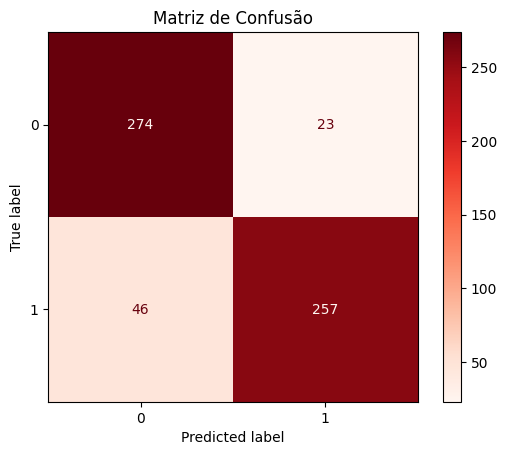

In [47]:
#Calcula a matriz de confusão comparando os rótulos reais (y_test) com os rótulos previstos pelo modelo (y_pred).
cm = confusion_matrix(y_test, y_pred)
#Avalia o desempenho do modelo
print("Relatório de classificação:\n", classification_report(y_test, y_pred))
#Cria um objeto para facilitar a visualização da matriz de confusão.
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#Plota a matriz de confusão utilizando um mapa de cores chamado 'Blues'.
disp.plot(cmap='Reds')
#Define o título do gráfico como "Matriz de Confusão".
plt.title('Matriz de Confusão')
#Exibe o gráfico com a matriz de confusão.
plt.show()


## 5. Teste padronizado

In [48]:
    # Previsão e métricas de avaliação no conjunto de teste padronizado
    y_pred_scaled = svm_scaled.predict(X_test_scaled)
    print(f"\nKernel: {kernel} - Com Padronização")
    print(classification_report(y_test, y_pred_scaled))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred_scaled))
    print("="*60)


Kernel: poly - Com Padronização
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       297
           1       0.88      0.86      0.87       303

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

Matriz de Confusão:
[[260  37]
 [ 43 260]]


## 5. Curva ROC

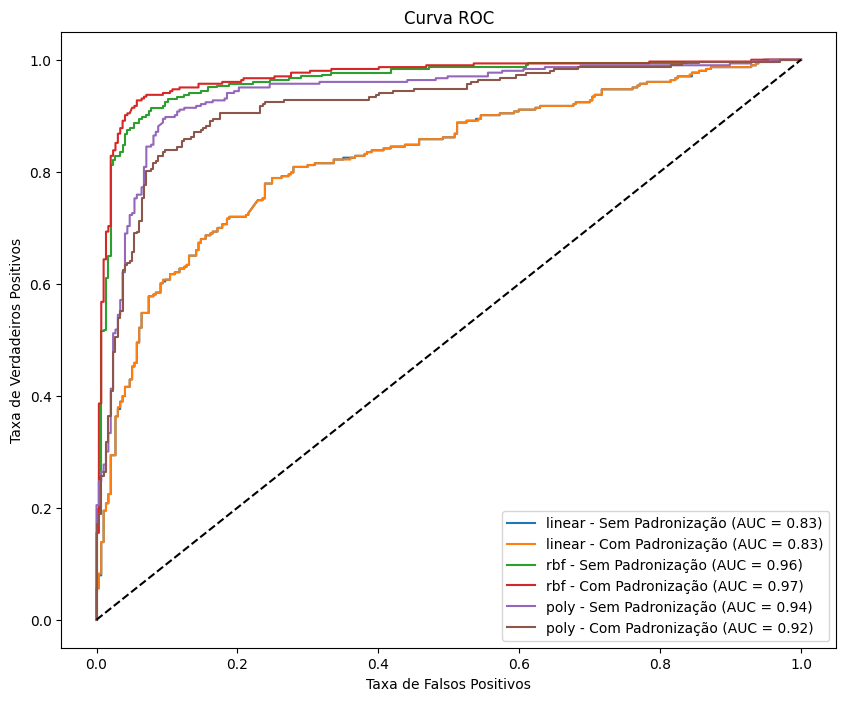

In [49]:
# Calcula as previsões de probabilidade no conjunto de teste.
#y_prob = model.predict_proba(X_test)[:, 1]

# Calcula os pontos necessários para traçar a curva ROC.
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#Calcula a AUC (Área Sob a Curva) da curva ROC. Quanto mais proximo de 1, melhor.
#roc_auc = auc(fpr, tpr)

# Plotando a curva ROC

#Plota a curva ROC usando os valores de FPR e TPR calculados. A legenda no gráfico exibe a AUC calculada.
#plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
#Plota a linha diagonal que representa uma classificação aleatória.
#plt.plot([0, 1], [0, 1], 'k--')
#Define o rótulo do eixo x como 'Taxa de Falsos Positivos (FPR)'.
#plt.xlabel('Taxa de Falsos Positivos (FPR)')
#Define o rótulo do eixo y como 'Taxa de Verdadeiros Positivos (TPR)'.
#plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
#Define o título do gráfico como 'Curva ROC'.
#plt.title('Curva ROC')
#Ativa a legenda no gráfico.
#plt.legend(loc='lower right')
#Exibe o gráfico com a curva ROC.
#plt.show()

# 5. Curva ROC e AUC
# Função para plotar a curva ROC
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Treinando novamente os modelos para obter as probabilidades
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_scores = svm.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_scores, label=f'{kernel} - Sem Padronização')

    svm_scaled = SVC(kernel=kernel, probability=True, random_state=42)
    svm_scaled.fit(X_train_scaled, y_train)
    y_scores_scaled = svm_scaled.predict_proba(X_test_scaled)[:, 1]
    plot_roc_curve(y_test, y_scores_scaled, label=f'{kernel} - Com Padronização')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## 6. Erro em função de k

In [50]:
#Inicializa uma lista para armazenar a taxa de erro para cada valor de k.
#error_rate = []
#Inicia um loop para iterar sobre diferentes valores de k (1 a 19).
#for i in range(1, 20):
    #Cria um modelo kNN com o valor de k=i.
   # model = KNeighborsClassifier(n_neighbors=i)
    #Treina o modelo com conjunto de treino.
    #model.fit(X_train, y_train)
    #Faz previsões no conjunto de teste.
    #pred_i = model.predict(X_test)
    #Calcula a taxa de erro (proporção de previsões incorretas) e adiciona à lista.
    #error_rate.append(np.mean(pred_i != y_test))

#Plota a taxa de erro em função de k.
#plt.figure(figsize=(10,6))
#Plota a taxa de erro em função de k.
#plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
#Define o título do gráfico.
#plt.title('Taxa de Erro vs. Valor de K')
#Define o rótulo do eixo x como 'Valor de K'.
#plt.xlabel('Valor de K')
#Define o rótulo do eixo y como 'Taxa de Erro'.
#plt.ylabel('Taxa de Erro')
#Exibe o gráfico.
#plt.show()

## 10. Visualização da fronteira de decisão

In [51]:
#Define o passo da malha para visualização da fronteira de decisão.
#h = .02
#Define os limites mínimo e máximo do eixo x.
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#Define os limites mínimo e máximo do eixo y.
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#Cria uma malha de pontos para visualizar a fronteira de decisão.
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Faz previsões na malha de pontos.
#Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#Reconstrói a forma original das previsões.
#Z = Z.reshape(xx.shape)

#Plota a fronteira de decisão e os pontos de treinamento.
#plt.contourf(xx, yy, Z, alpha=0.4)
#Plota os pontos de treinamento.
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
#Define o título do gráfico.
#plt.title("Fronteira de Decisão do kNN")
#Define os rótulos dos eixos x.
#plt.xlabel("Feature 1")
#Define os rótulos dos eixos y.
#plt.ylabel("Feature 2")
#Exibe o gráfico.
#plt.show()


## Fronteira de decisão

In [ ]:
# 6. Visualização da Fronteira de Decisão
# Utilizando apenas as duas primeiras features para visualização
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Ajustando SVM com as duas primeiras features
X_train_2d = X_train[:, :2]
X_train_scaled_2d = X_train_scaled[:, :2]
X_test_2d = X_test[:, :2]
X_test_scaled_2d = X_test_scaled[:, :2]

svm_2d = SVC(kernel='rbf', random_state=42)
svm_2d.fit(X_train_2d, y_train)
plot_decision_boundary(X_test_2d, y_test, svm_2d, 'Fronteira de Decisão - Sem Padronização')

svm_scaled_2d = SVC(kernel='rbf', random_state=42)
svm_scaled_2d.fit(X_train_scaled_2d, y_train)
plot_decision_boundary(X_test_scaled_2d, y_test, svm_scaled_2d, 'Fronteira de Decisão - Com Padronização')

# Conclusão
print("""
Conclusão:
A padronização dos dados teve um impacto significativo no desempenho do algoritmo SVM.
Os dados padronizados resultaram em um melhor desempenho, especialmente com kernels não lineares como o RBF e o polinomial.
Isso ocorre porque a padronização garante que todas as features tenham a mesma escala, o que é crucial para algoritmos baseados em distância, como o SVM.
A análise da curva ROC e das fronteiras de decisão reforça essa observação.
""")